# HW1 - EDA

## Mateusz Borowski

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16
sns.set_context('paper', font_scale=1.4)
pd.set_option('display.max_columns', None)

sns.set()

### Wczytanie i wstępne zapoznanie się z danymi

In [2]:
df = pd.read_csv('../students.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

### Sprawdzenie ewentualnych braków w danych

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
class         0
dtype: int64

Widzimy, że nie ma braków w danych

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Zmienne

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'class'],
      dtype='object')

`school` - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

`sex` - student's sex (binary: 'F' - female or 'M' - male)

`age` - student's age (numeric: from 15 to 22)

`address` - student's home address type (binary: 'U' - urban or 'R' - rural)

`famsize` - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

`Pstatus` - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

`Medu` - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

`Fedu` - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

`Mjob` - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

`Fjob` - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

`reason` - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

`guardian` - student's guardian (nominal: 'mother', 'father' or 'other')

`traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

`studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

`failures` - number of past class failures (numeric: n if 1<=n<3, else 4)

`schoolsup` - extra educational support (binary: yes or no)

`famsup` - family educational support (binary: yes or no)

`paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

`activities` - extra-curricular activities (binary: yes or no)

`nursery` - attended nursery school (binary: yes or no)

`higher` - wants to take higher education (binary: yes or no)

`internet` - Internet access at home (binary: yes or no)

`romantic` - with a romantic relationship (binary: yes or no)

`famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

`freetime` - free time after school (numeric: from 1 - very low to 5 - very high)

`goout` - going out with friends (numeric: from 1 - very low to 5 - very high)

`Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

`Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

`health` - current health status (numeric: from 1 - very bad to 5 - very good)

`absences` - number of school absences (numeric: from 0 to 93)


`G1` - first period grade (numeric: from 0 to 20)

`G2` - second period grade (numeric: from 0 to 20)

`G3` - final grade (numeric: from 0 to 20, output target)

### Kolumna celu - `G3` - ocena końcowa

[]

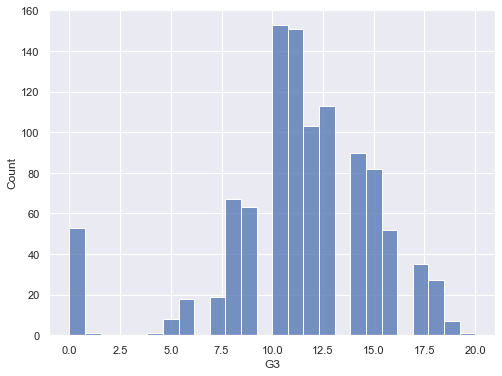

In [7]:
sns.histplot(df['G3'])
plt.plot()

### Rozkład zmiennych numerycznych

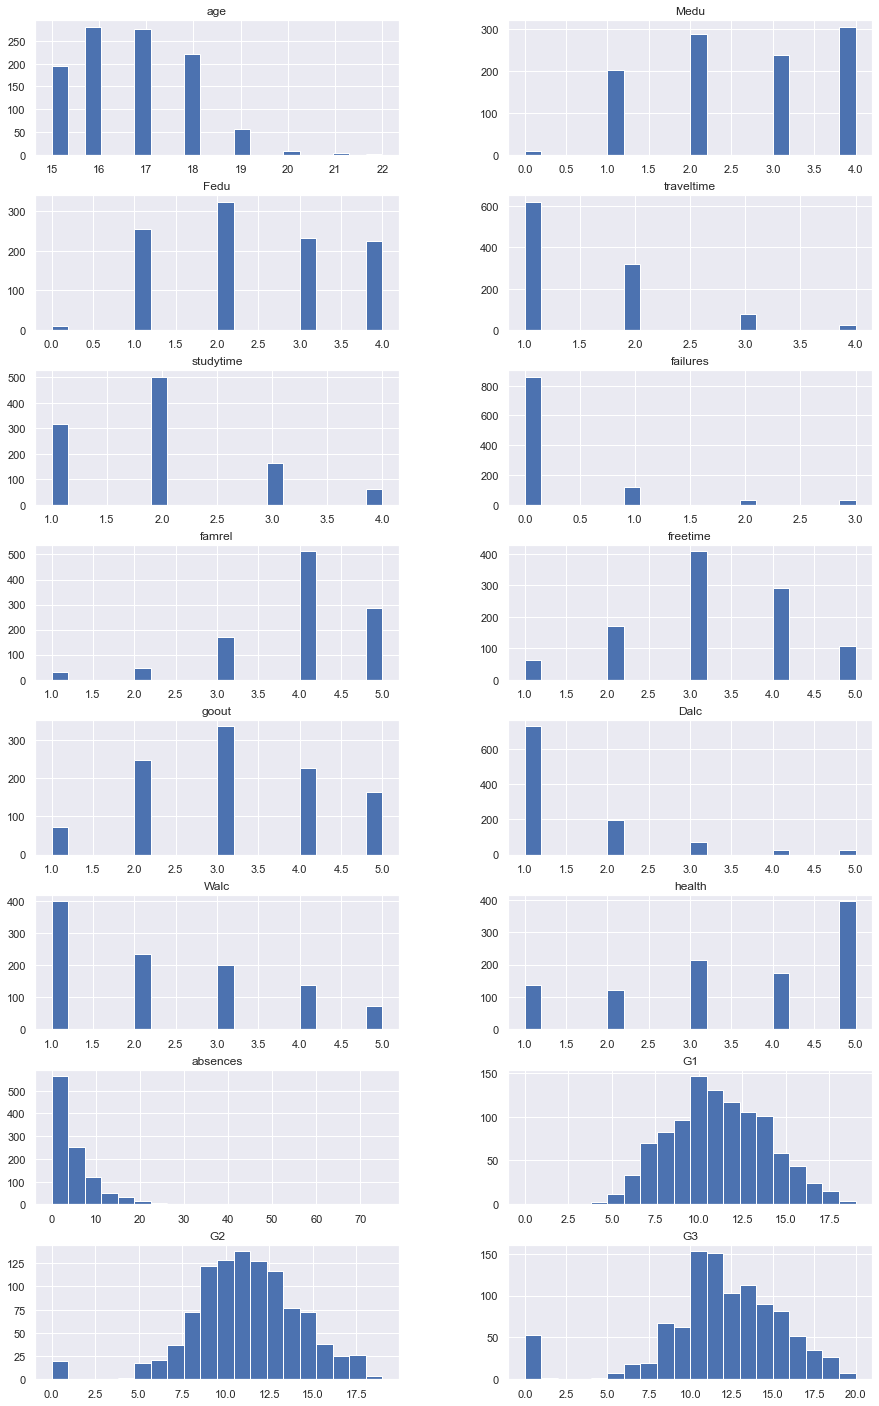

In [8]:
df.hist(bins = 20, figsize = (15,25), layout=(8,2))
plt.show()

In [9]:
numerical_columns = df.select_dtypes('number').columns
categorical_columns = df.select_dtypes('object').columns

### Outlierzy

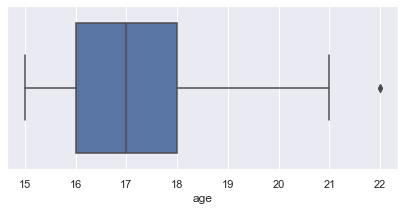

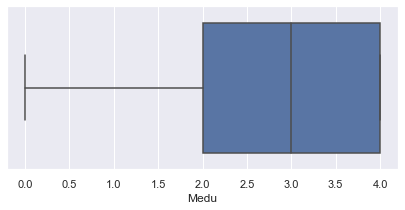

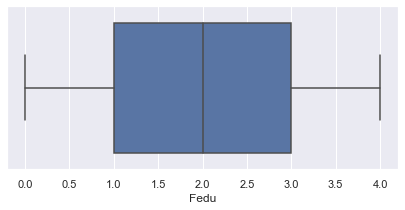

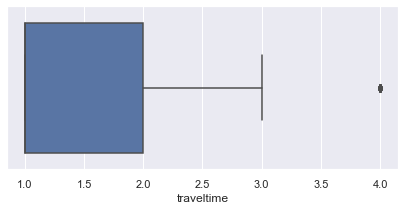

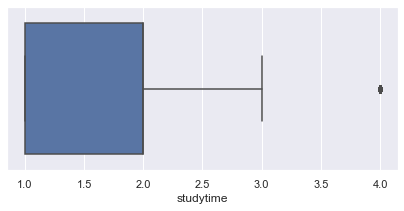

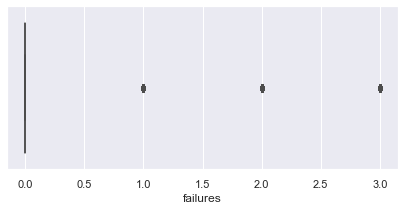

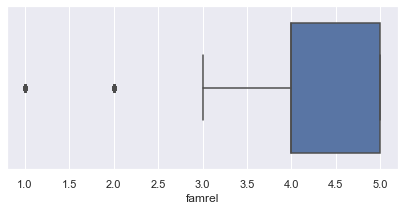

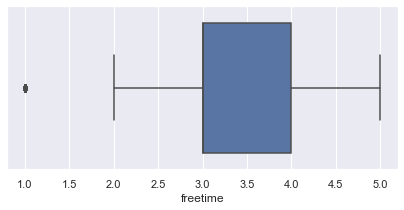

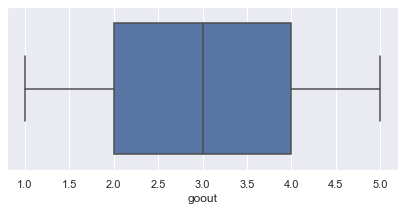

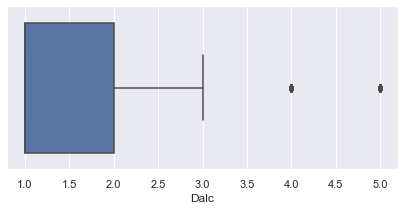

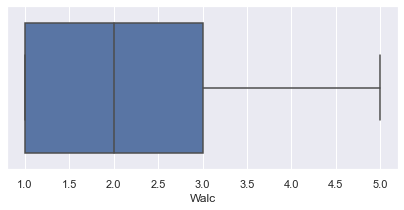

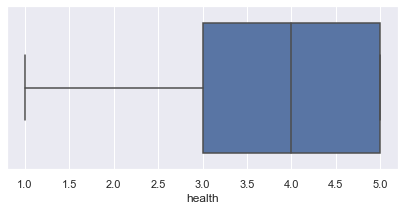

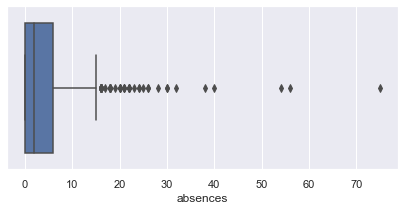

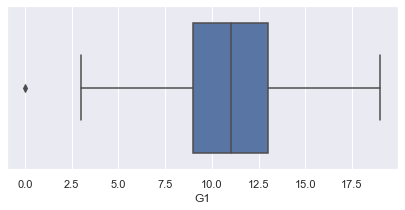

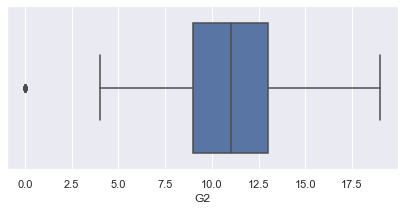

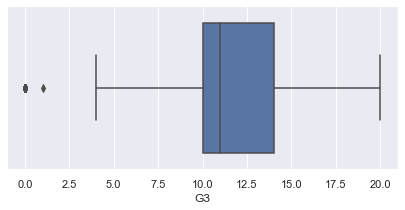

In [10]:
for col in  numerical_columns:
    plt.figure(figsize=(7,3))
    sns.boxplot(data=df, x = col)
    plt.show()

Warto odnotować, że obserwacje, w których liczba niezdanych klas jest różna od 0 zdarzają się niezwykle rzadko.

### Rozkład zmiennych kategorycznych

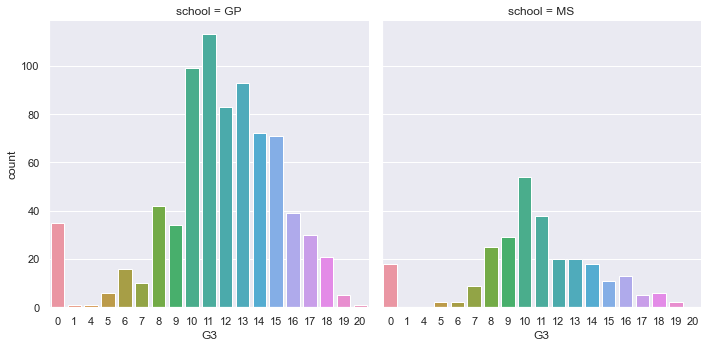

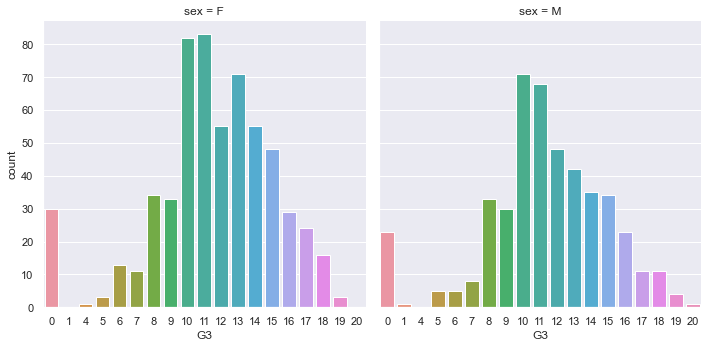

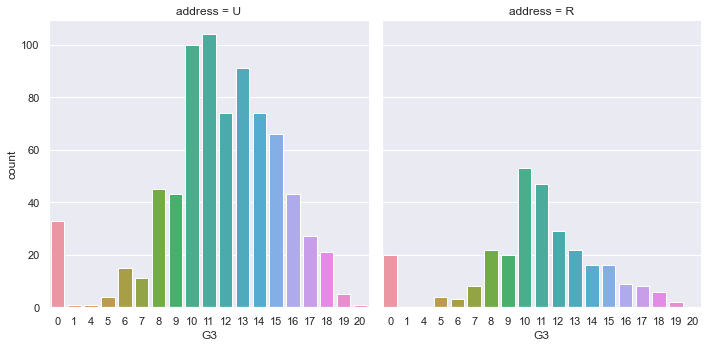

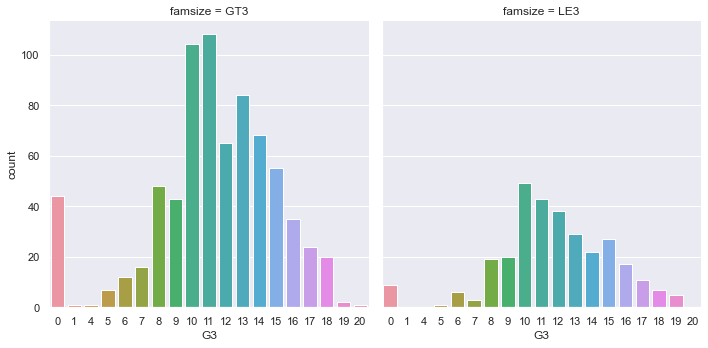

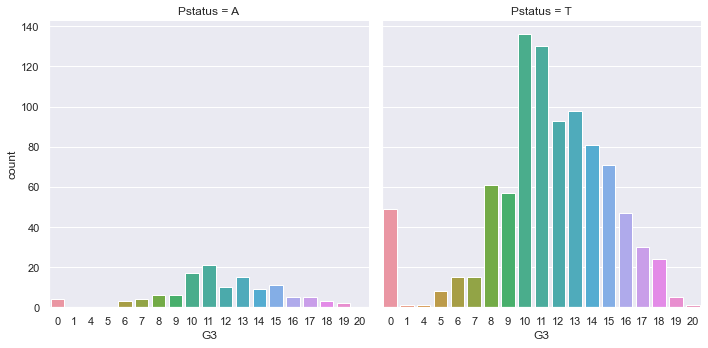

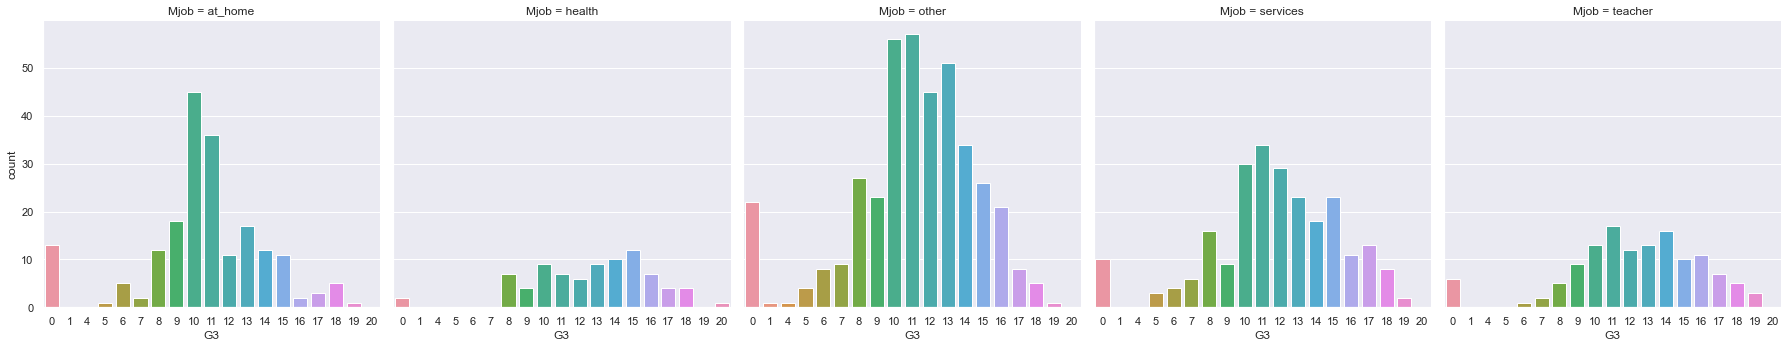

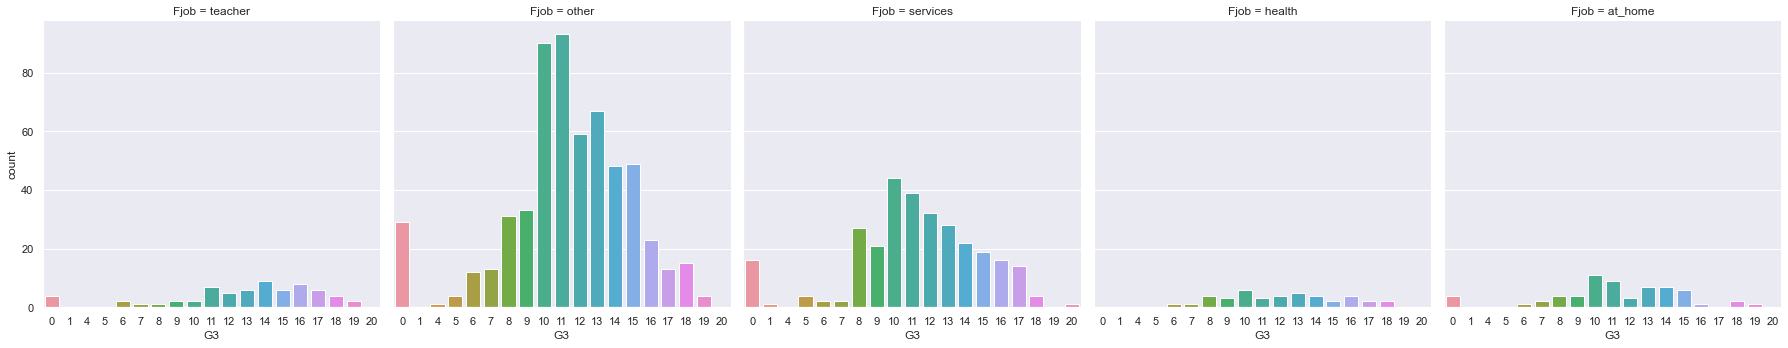

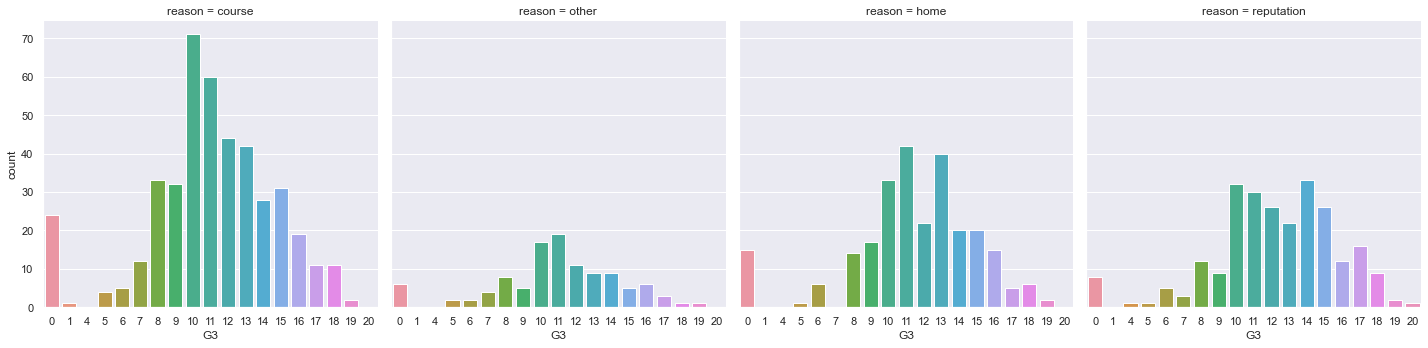

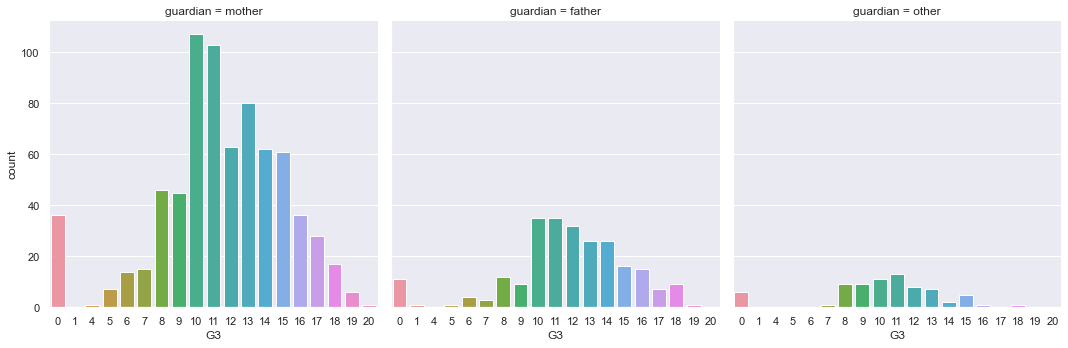

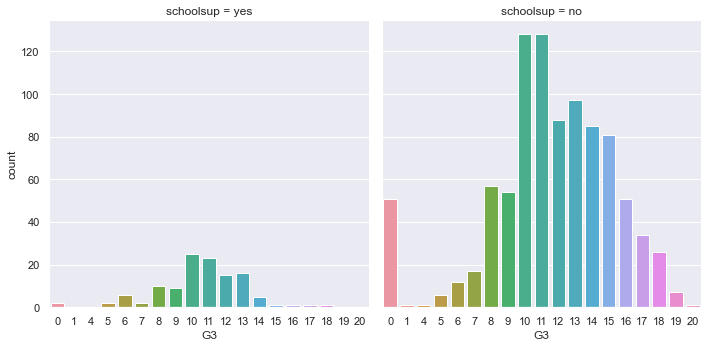

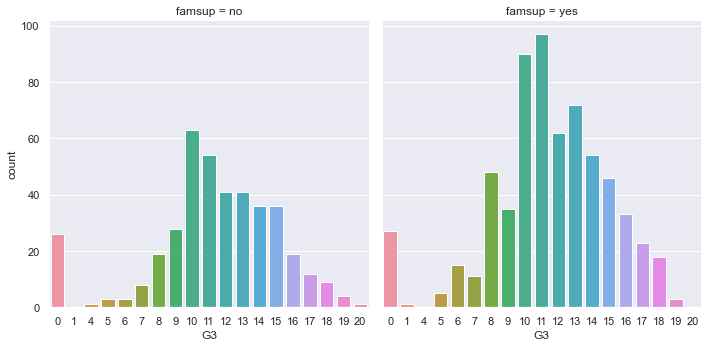

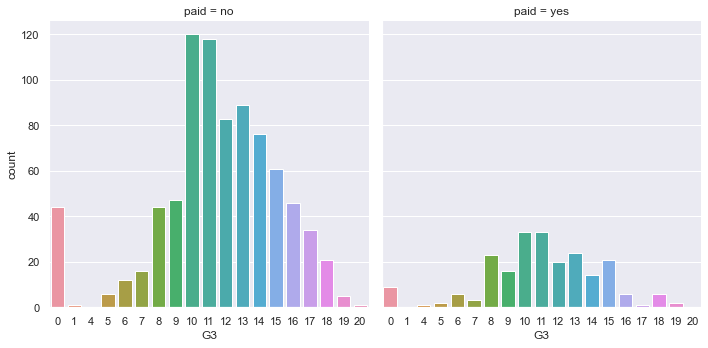

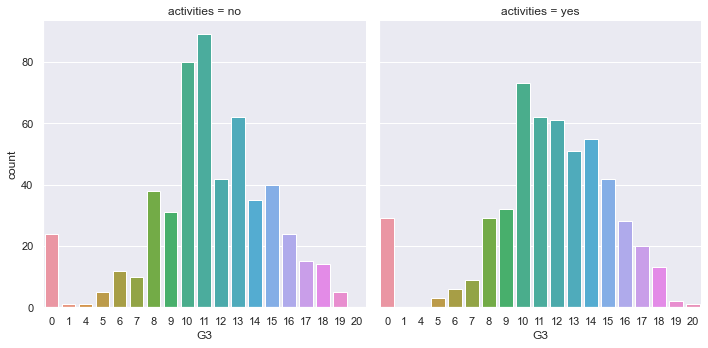

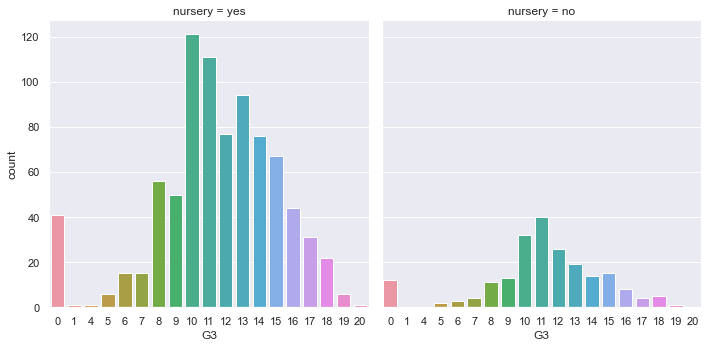

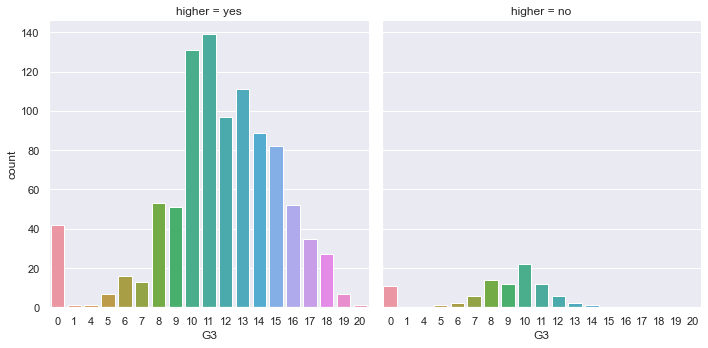

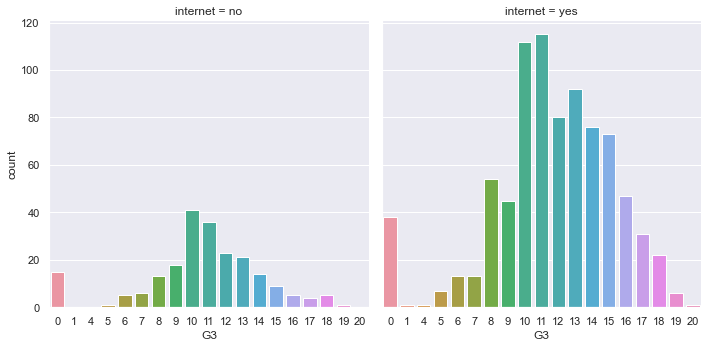

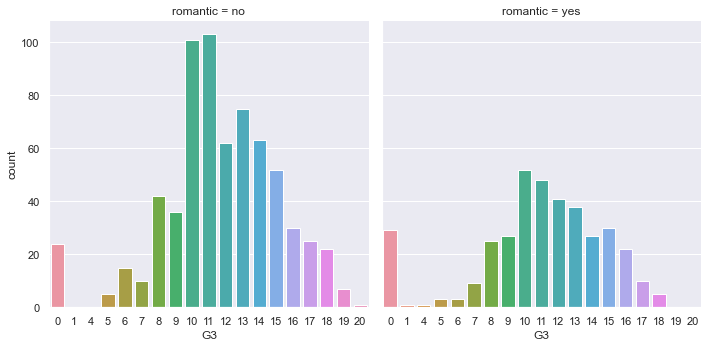

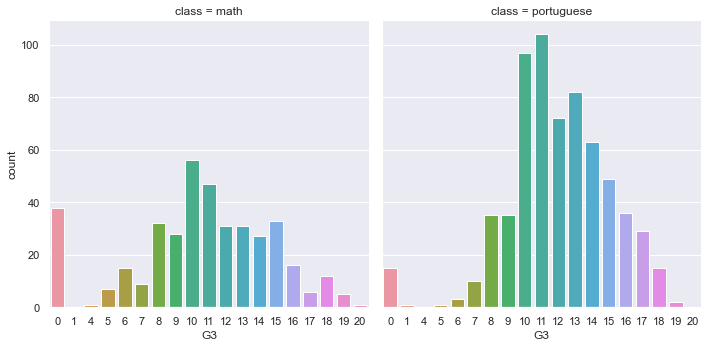

In [11]:
for col in categorical_columns:
    sns.catplot(data=df, x='G3', col=col, kind='count', hue=None)

### Koleracja zmiennych

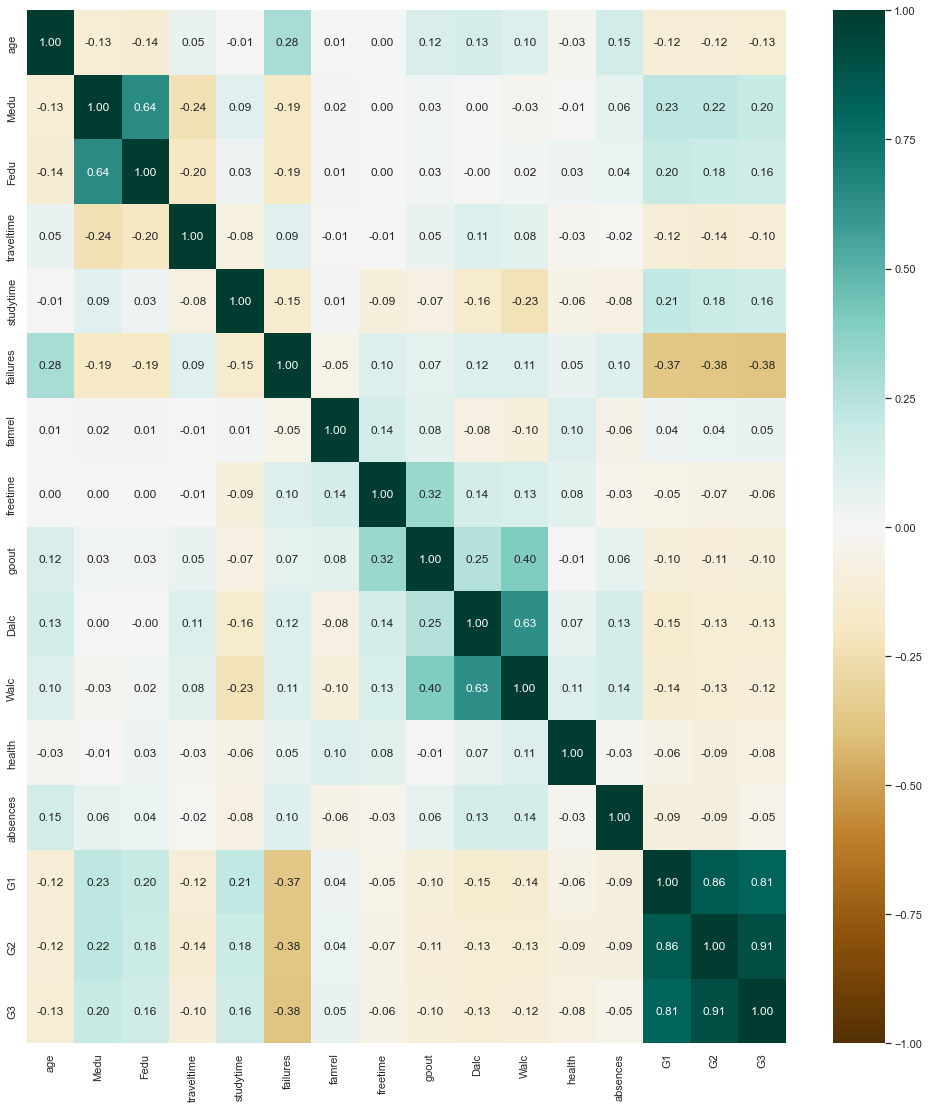

In [12]:
plt.figure(figsize=(17, 19))
heatmap = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG", fmt=".2f")
plt.show()

In [13]:
df.corr()['G3'].abs().sort_values(ascending=False)

G3            1.000000
G2            0.910743
G1            0.809142
failures      0.383145
Medu          0.201472
studytime     0.161629
Fedu          0.159796
Dalc          0.129642
age           0.125282
Walc          0.115740
traveltime    0.102627
goout         0.097877
health        0.080079
freetime      0.064890
famrel        0.054461
absences      0.045671
Name: G3, dtype: float64

Kolumny, które są najlepiej skorelowane (z dokładnością co do znaku) ze zmienną celu to `G1`, `G2`, `failures`, `Medu`, `studytime`, `Fedu`, `Dalc`, `age`, `Walc`. Przyjrzyjmy im się dokładniej.

In [14]:
def make_pair_grid_plot(columns, size=(10, 10)):
    grid = sns.PairGrid(df, vars=columns)
    grid = grid.map_upper(sns.kdeplot, fill=True, thresh=0.05)
    grid = grid.map_diag(sns.histplot)
    grid = grid.map_lower(sns.scatterplot, edgecolor='k')

    grid.fig.tight_layout()

    grid.fig.set_size_inches(size[0], size[1])

    plt.subplots_adjust(top=0.9)

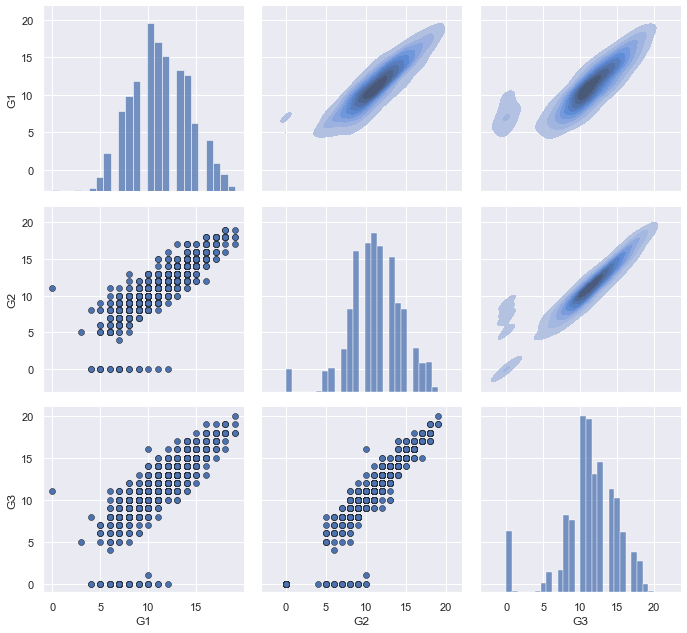

In [15]:
make_pair_grid_plot(['G1', 'G2', 'G3'])

Możemy zauważyć, że oceny za pierwszy i drugi semestr są bardzo silnie skorelowane nie tylko ze zmienną celu, jakim jest ostateczna ocena, ale również ze sobą

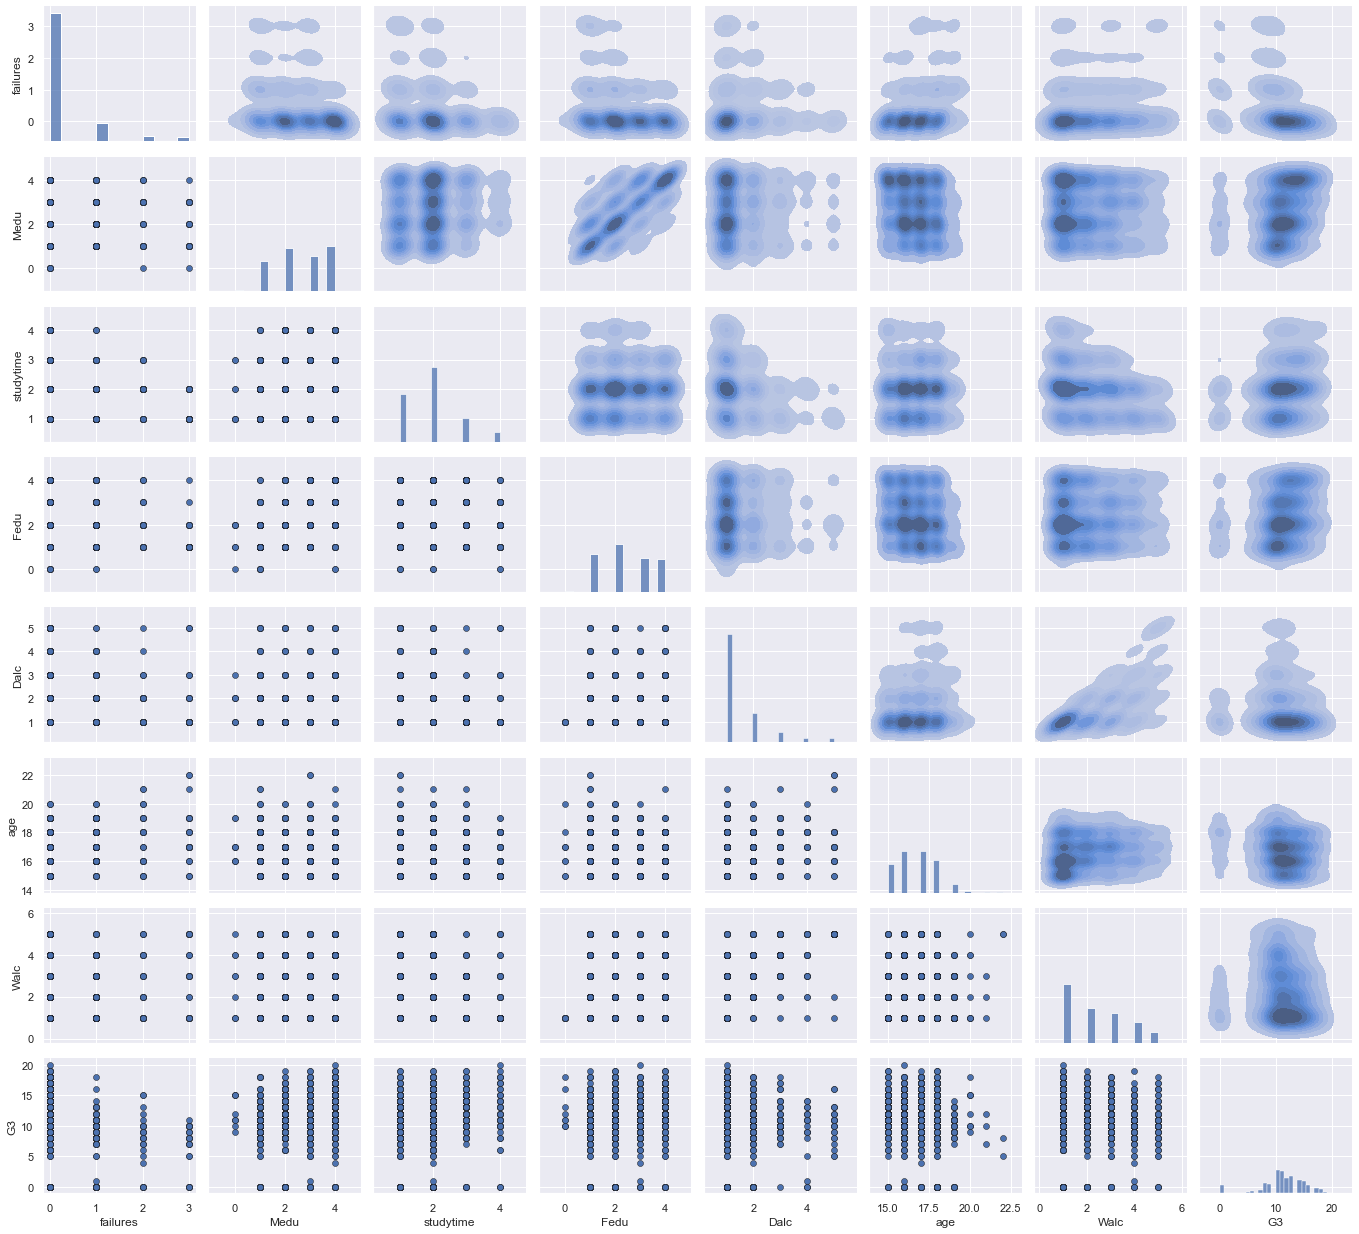

In [16]:
make_pair_grid_plot(['failures', 'Medu', 'studytime', 'Fedu', 'Dalc', 'age', 'Walc', 'G3'], size=(19, 19))

Na powyższej siatce wykresów w oczy rzuca się korelacja pomiędzy konsumpcją alkoholu w tygodniu i weekendzie, a także pomiędzy wykształceniem matki i ojca